__Plot SPECFEM seismograms__

Daniel Köhn 
Kiel, 12/01/2018

__Import Libraries__

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.colors import LightSource, Normalize
from matplotlib.pyplot import gca
from pylab import rcParams
from matplotlib import rc
from matplotlib.ticker import FormatStrFormatter

__Define fonts__

In [2]:
FSize = 20
font = {'color':  'black',
        'weight': 'normal',
        'size': FSize}
mpl.rc('xtick', labelsize=FSize) 
mpl.rc('ytick', labelsize=FSize) 
rcParams['figure.figsize'] = 12, 11

__Read seismogram__

In [3]:
basename = "OUTPUT_FILES/seis/"
state = "EU"
station =  "H0R0"

In [4]:
# define file names for all components
name_seis_R = basename + state + "." + station + ".MXR.sem.ascii"
name_seis_T = basename + state + "." + station + ".MXT.sem.ascii"
name_seis_Z = basename + state + "." + station + ".MXZ.sem.ascii"

In [5]:
# read 3-component data
data_R = np.genfromtxt(name_seis_R, dtype=None)
data_T = np.genfromtxt(name_seis_T, dtype=None)
data_Z = np.genfromtxt(name_seis_Z, dtype=None)

In [6]:
# define time vector [minutes]
t = data_R[:,0] / 60.0

__Define SubPlot__

In [7]:
def do_plot(n, seis, an, title):
    
    ax=plt.subplot(3, 1, n)    
    
    rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    rc('text', usetex=True)
    
    plt.plot(t,seis[:,1])
    a = gca()
    a.set_xticklabels(a.get_xticks(), font)
    a.set_yticklabels(a.get_yticks(), font)
    plt.axis('tight')
    plt.title(title, fontdict=font)
    plt.ylabel(an, fontdict=font)
    if n!=3:
        ax.set_xticks([])
    if n==3:
        plt.xlabel('Time [minutes]', fontdict=font)
    plt.tight_layout()

__Plot SubPlots__

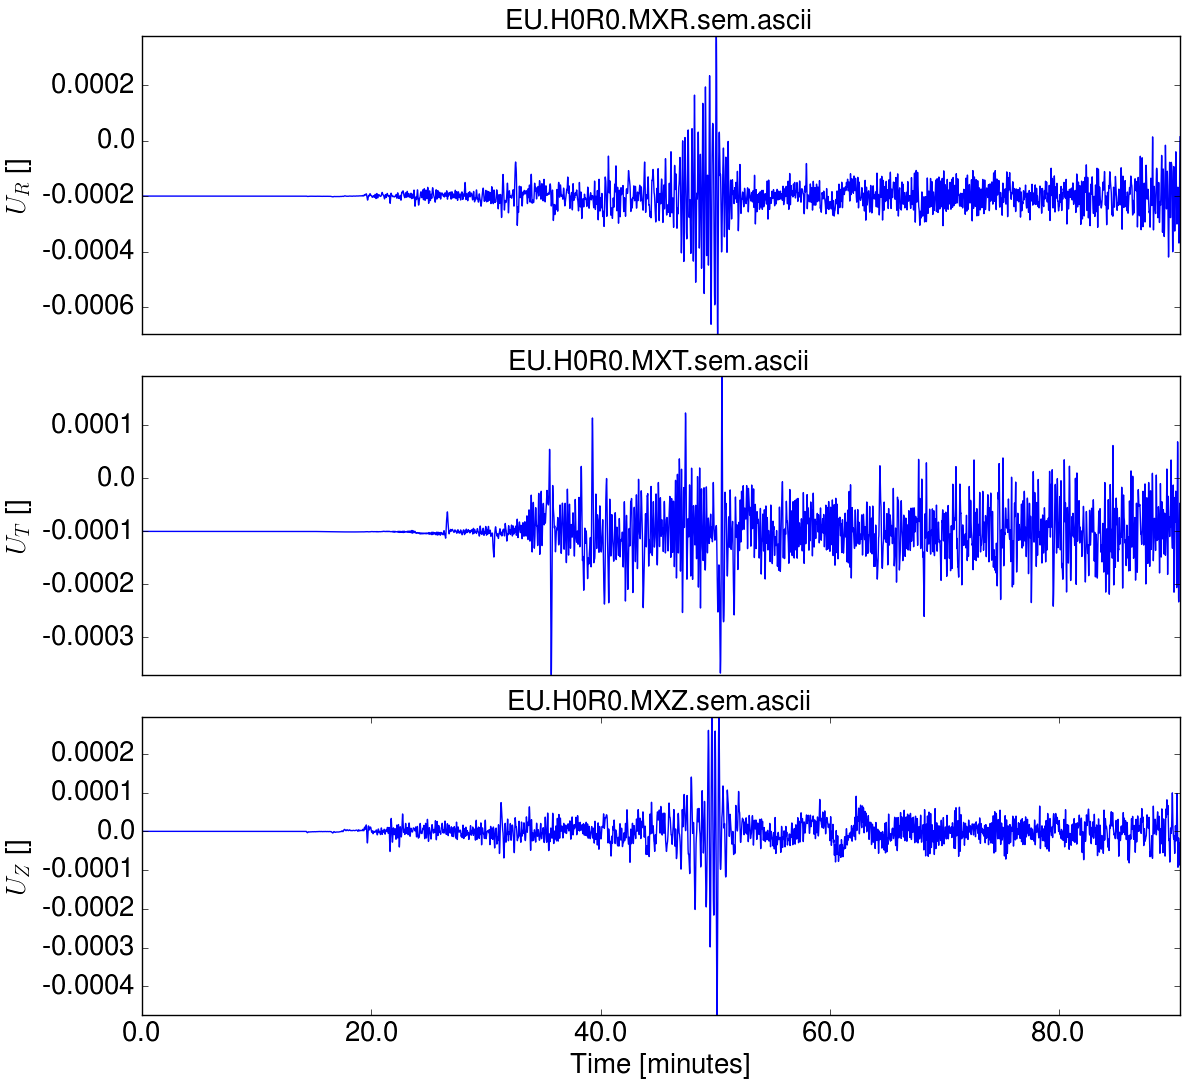

In [8]:
plt.close('all')
plt.figure()
do_plot(1, data_R, '$U_R$ []', state + "." + station + ".MXR.sem.ascii")
do_plot(2, data_T, '$U_T$ []', state + "." + station + ".MXT.sem.ascii")
do_plot(3, data_Z, '$U_Z$ []', state + "." + station + ".MXZ.sem.ascii")
filename = state + "." + station + ".pdf"
plt.savefig(filename, bbox_inches='tight', format='pdf')
#plt.savefig(filename, bbox_inches='tight', format='png', dpi=200)
plt.show()